<a href="https://colab.research.google.com/github/Samarth-Kanodia/Chicage-Crime-Rate-Prophet-/blob/main/Chicago_Crime_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement:

The Chicago Crime dataset contains a summary of the reported crimes occurred in the City of Chicago from 2001 to 2017.
Dataset has been obtained from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system.
Dataset contains the following columns:
<ul>
<li>
ID: Unique identifier for the record.
<li>
Case Number: The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.
</li>
<li>
Date: Date when the incident occurred.
</li>
<li>
Block: address where the incident occurred
</li>
<li>
IUCR: The Illinois Unifrom Crime Reporting code.
</li>
<li>
Primary Type: The primary description of the IUCR code.
</li>
<li>
Description: The secondary description of the IUCR code, a subcategory of the primary description.
</li>
<li>
Location Description: Description of the location where the incident occurred.
</li>
<li>
Arrest: Indicates whether an arrest was made.
</li>
<li>
Domestic: Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.
</li>
<li>
Beat: Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car.
</li>
<li>
District: Indicates the police district where the incident occurred.
</li>
<li>
Ward: The ward (City Council district) where the incident occurred.
</li>
<li>
Community Area: Indicates the community area where the incident occurred. Chicago has 77 community areas.
</li>
<li>
FBI Code: Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS).
</li>
<li>
X Coordinate: The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection.
</li>
<li>
Y Coordinate: The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection.
</li>
<li>
Year: Year the incident occurred.
</li>
<li>
Updated On: Date and time the record was last updated.
</li>
<li>
Latitude: The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
</li>
<li>
Longitude: The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
</li>
<li>
Location: The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.
</li>
</ul>

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from prophet import Prophet

In [3]:
# reading the csv files
df1 = pd.read_csv("Chicago_Crimes_2001_to_2004.csv", on_bad_lines = 'skip')
df2 = pd.read_csv("Chicago_Crimes_2005_to_2007.csv", on_bad_lines = 'skip')
df3 = pd.read_csv("Chicago_Crimes_2008_to_2011.csv", on_bad_lines = 'skip')
df4 = pd.read_csv("Chicago_Crimes_2012_to_2017.csv", on_bad_lines = 'skip')

<ipython-input-3-e85514d04f51>:2: DtypeWarning: Columns (17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("Chicago_Crimes_2001_to_2004.csv", on_bad_lines = 'skip')


In [4]:
# creating a single dataframe
df = pd.concat([df1, df2, df3, df4], ignore_index = False, axis = 0)

In [5]:
# displaying the first 5 values
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691785,-87.635116,"(41.691784636, -87.635115968)"


In [6]:
# dropping the unnecessary columns
df.drop(['Unnamed: 0', 'Case Number', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate', 'Updated On', 'Year', 'FBI Code', 'Beat', 'Ward', 'Community Area', 'Location', 'District', 'Latitude', 'Longitude'], inplace = True, axis = 1)

In [7]:
df.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,4786321,01/01/2004 12:01:00 AM,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
1,4676906,03/01/2003 12:00:00 AM,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2,4789749,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
3,4789765,12/30/2004 08:00:00 PM,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
4,4677901,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False


In [8]:
# checking for null values
df.isnull().sum()

,0
ID,0
Date,0
Block,0
Primary Type,0
Description,0
Location Description,1990
Arrest,0
Domestic,0


In [9]:
# converting the Date column to appropriate Date-Time format
df.Date = pd.to_datetime(df.Date, format = '%m/%d/%Y %I:%M:%S %p')

In [10]:
df.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,4786321,2004-01-01 00:01:00,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
1,4676906,2003-03-01 00:00:00,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2,4789749,2004-06-20 11:00:00,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
3,4789765,2004-12-30 20:00:00,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
4,4677901,2003-05-01 01:00:00,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False


In [11]:
# resetting the index of the dataframe to use the default one
df.reset_index(inplace = True)

In [12]:
df.head()

,index,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,0,4786321,2004-01-01 00:01:00,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
1,1,4676906,2003-03-01 00:00:00,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2,2,4789749,2004-06-20 11:00:00,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
3,3,4789765,2004-12-30 20:00:00,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
4,4,4677901,2003-05-01 01:00:00,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False


##Exploratory Data Analysis

###Univariate Analysis

In [13]:
df['Primary Type'].value_counts()

,count
Primary Type,
THEFT,1640506
BATTERY,1442716
CRIMINAL DAMAGE,923000
NARCOTICS,885431
OTHER OFFENSE,491922
ASSAULT,481661
BURGLARY,470958
MOTOR VEHICLE THEFT,370548
ROBBERY,300453


<Axes: xlabel='count', ylabel='Primary Type'>

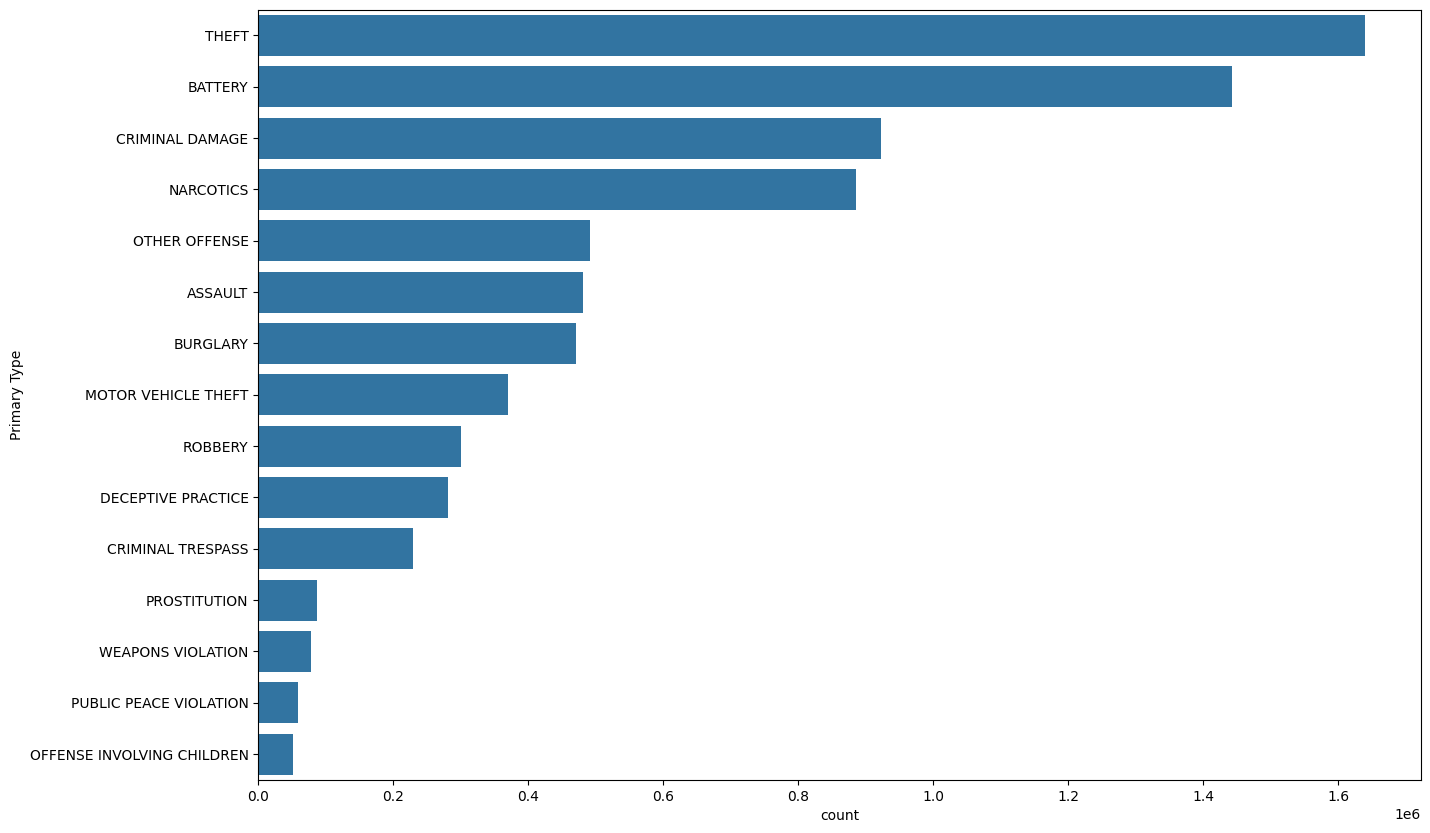

In [14]:
plt.figure(figsize = (15, 10))
sns.countplot(y = 'Primary Type', data = df, order = df['Primary Type'].value_counts().iloc[:15].index)

The above countplot shows the different kinds of crimes that were committed with their frequency

In [15]:
df['Location Description'].value_counts()

,count
Location Description,
STREET,2101842
RESIDENCE,1341749
SIDEWALK,815595
APARTMENT,812512
OTHER,294286
...,...
CLEANERS/LAUNDROMAT,1
EXPRESSWAY EMBANKMENT,1
GOVERNMENT BUILDING,1


<Axes: xlabel='count', ylabel='Location Description'>

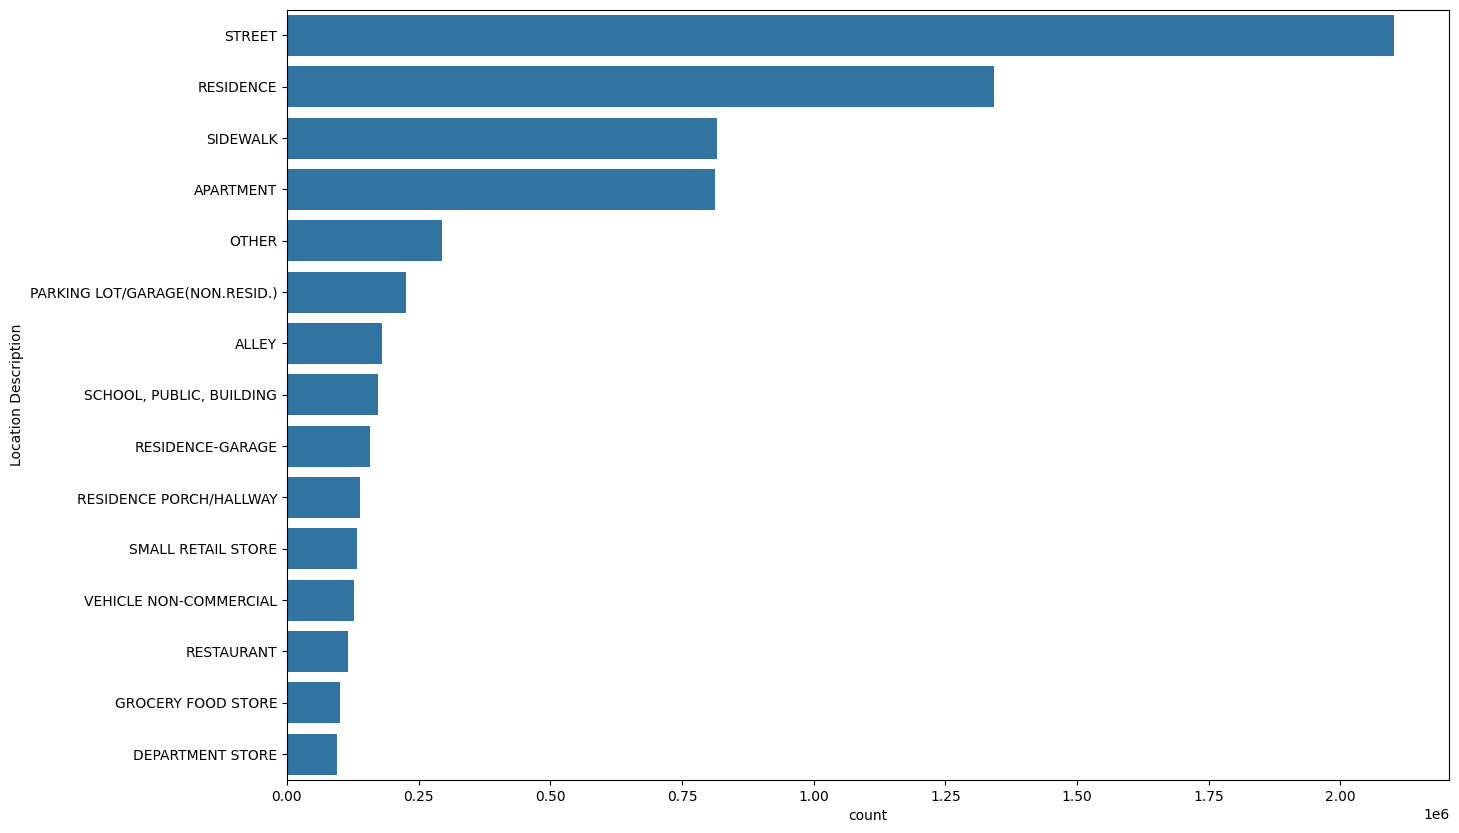

In [16]:
plt.figure(figsize = (15, 10))
sns.countplot(y = 'Location Description', data = df, order = df['Location Description'].value_counts().iloc[:15].index)

The above countplot shows the different locations where the crimes were committed with the frequency

In [17]:
df['Description'].value_counts()

,count
Description,
SIMPLE,924724
$500 AND UNDER,611161
DOMESTIC BATTERY SIMPLE,608759
TO VEHICLE,445776
TO PROPERTY,420681
...,...
LOTTERY/PARI-MUTUEL,2
THEFT RETAIL,1
DISCLOSE DV VICTIM LOCATION,1


<Axes: xlabel='count', ylabel='Description'>

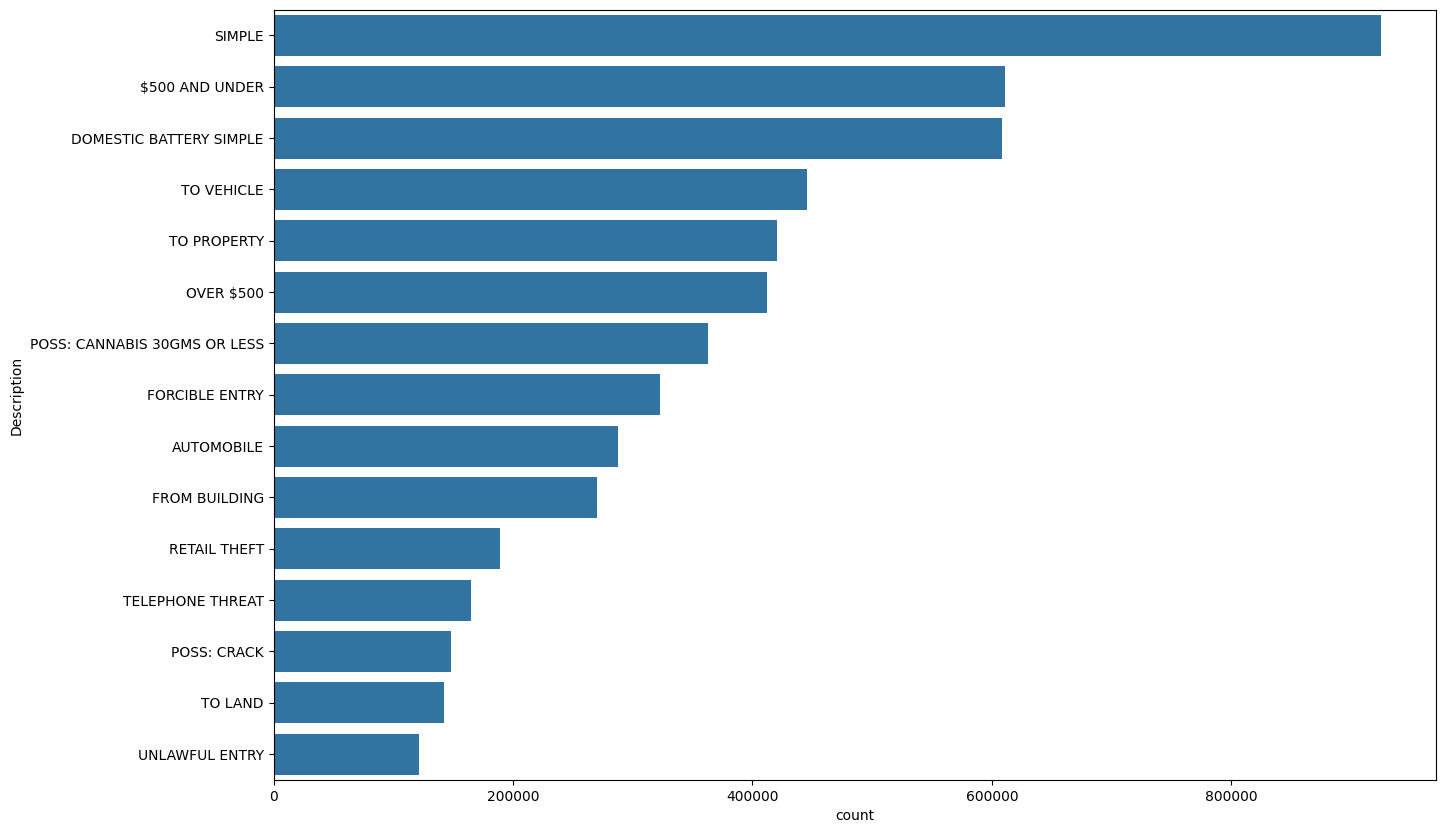

In [18]:
plt.figure(figsize = (15, 10))
sns.countplot(y = 'Description', data = df, order = df['Description'].value_counts().iloc[:15].index)

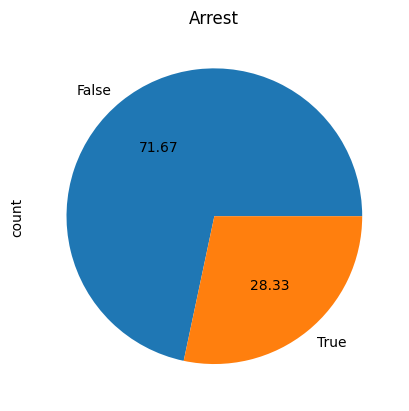

In [19]:
df['Arrest'].value_counts().plot(kind = 'pie', autopct = '%.2f')
plt.title("Arrest")
plt.show()

The above pie chart displays the proportion of crimes in which the criminals were arrested

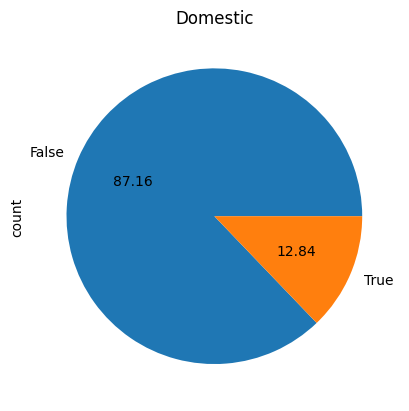

In [20]:
df['Domestic'].value_counts().plot(kind = 'pie', autopct = '%.2f')
plt.title("Domestic")
plt.show()

###Bivariate Analysis

In [21]:
pd.crosstab(df['Arrest'], df['Primary Type'])

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,DOMESTIC VIOLENCE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Arrest,,,,,,,,,,,,,,,,,,,,,
False,11371,367725,1112664,443905,13,24931,857611,61231,228184,0,...,408461,434,2,20596,28,270736,19539,3127,1444055,15385
True,1726,113936,330052,27053,77,4937,65389,168135,52747,2,...,83461,85967,161,37952,3,29717,9168,607,196451,62044


In [22]:
pd.crosstab(df['Arrest'], df['Domestic'])

Domestic,False,True
Arrest,,
False,4875513,816349
True,2046318,203102


In [23]:
# setting the Date column as the index of the dataframe for resampling
df.index = pd.DatetimeIndex(df.Date)

In [24]:
# resampling based on year
df.resample('YE').size()

,0
Date,
2001-12-31,568518
2002-12-31,490879
2003-12-31,475913
2004-12-31,388205
2005-12-31,455811
2006-12-31,794684
2007-12-31,621848
2008-12-31,852053
2009-12-31,783900


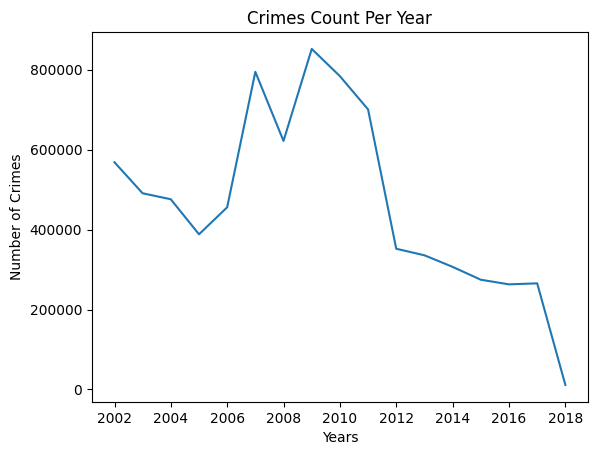

In [25]:
plt.plot(df.resample('YE').size())
plt.title('Crimes Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')
plt.show()

Although Chicago witnessed increased crime rate from 2006 to 2009, the responsible departments did their duties well to ensure decrease of crimes from 2010 to 2018 and that too at an impressive rate



In [26]:
# resampling based on month
df_resampled = df.resample('ME').size()
print(df_resampled)

Date
2001-01-31    74995
2001-02-28    66288
2001-03-31    53122
2001-04-30    40166
2001-05-31    41876
              ...  
2016-09-30    23235
2016-10-31    23314
2016-11-30    21140
2016-12-31    19580
2017-01-31    11357
Freq: ME, Length: 193, dtype: int64


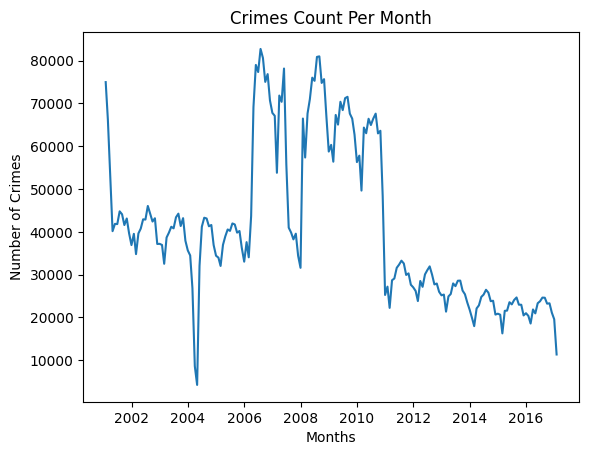

In [27]:
plt.plot(df.resample('ME').size())
plt.title('Crimes Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')
plt.show()

In [28]:
df_resampled = pd.DataFrame(df_resampled)

In [29]:
# changing index name from "Date" to "ds"
df_resampled.index.name = "ds"

# changing column name from "0" to "y"
df_resampled.columns = ['y']

In [30]:
df_resampled.head()

,y
ds,
2001-01-31,74995
2001-02-28,66288
2001-03-31,53122
2001-04-30,40166
2001-05-31,41876


In [31]:
# resetting the index of the dataframe to use the default one
df_resampled.reset_index(inplace = True)

In [32]:
df_resampled.head()

,ds,y
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876


###Prophet
Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects released by Facebook’s Core Data Science team. It is robust to missing data and shifts in the trend, and typically handles outliers well.


In [33]:
# creating the model
model = Prophet()

In [34]:
# fitting the model to dataframe resample with month
model.fit(df_resampled)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp71r875g8/03r0v7hh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp71r875g8/2zy6guri.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14954', 'data', 'file=/tmp/tmp71r875g8/03r0v7hh.json', 'init=/tmp/tmp71r875g8/2zy6guri.json', 'output', 'file=/tmp/tmp71r875g8/prophet_model8mydrwmb/prophet_model-20241213172118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:21:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:21:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [35]:
# make_future_dataframe is a helper method to create a dataframe of future dates
future = model.make_future_dataframe(periods = 730)

In [36]:
# making predictions on the future dates
prediction = model.predict(future)
prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2001-01-31,38991.658635,22407.820452,55433.432740
1,2001-02-28,34258.479764,18781.645203,50999.834976
2,2001-03-31,38808.337868,23112.059700,54961.406755
3,2001-04-30,39560.548013,23874.611706,55712.803232
4,2001-05-31,45080.487573,29371.350506,61806.264434


In [37]:
# visualising the predictions
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(model, prediction)

In [38]:
plot_components_plotly(model, prediction)

/usr/local/lib/python3.10/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



###Conclusion:
The crime rate was predicted successfully for subsequent 2 years following the dataset according to the idenitified trend